<a href="https://colab.research.google.com/github/mohansameer1983/AI-Finance/blob/main/Team_Assignment_3_StatArb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI - 823 - Team Assignment-3
### We use 6 pairs of currencies for the portfolio
### GBPUSD pair as the asset for trading: TRADING_INSTRUMENT = 'GBPUSD=X'

In [102]:
import pandas as pd
import numpy as np

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

# Fetch daily data for 10 years, for 6 major currency pairs
TRADING_INSTRUMENT = 'GBPUSD=X'
SYMBOLS = ['AUDUSD=X', 'GBPUSD=X', 'CADUSD=X', 'CHFUSD=X', 'EURUSD=X', 'JPYUSD=X']
        
START_DATE = '2010-01-01'
END_DATE = '2020-12-31'

module 'yfinance' is installed


# 1(a) - Download data for 6 currency pairs (2019-2020)
### *** GCBP/USD is Trading Instrument ***
Scale the JPY/USD pair by 100.0 and CNY/USD by 10 purely for visualization scaling purposes:

[*********************100%***********************]  6 of 6 completed


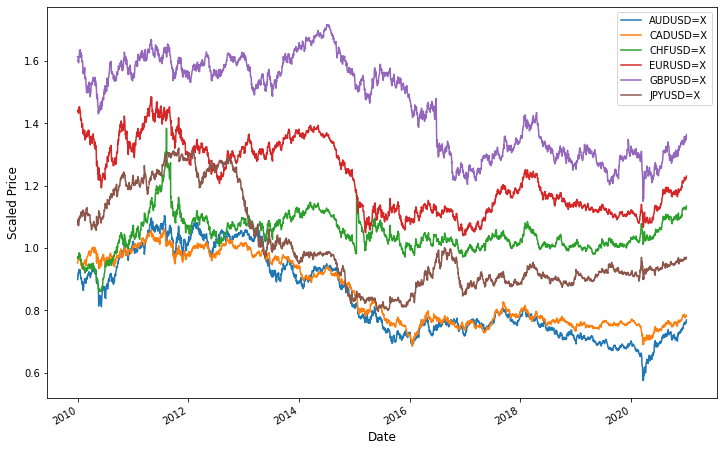

In [27]:
df_orig=yf.download(SYMBOLS, START_DATE, END_DATE)['Close']
df=df_orig
df['JPYUSD=X']=df_orig['JPYUSD=X']*100   

df.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Scaled Price', fontsize=12)
plt.legend(prop={'size': 10})
plt.show()


#1(b) - Create ML Model for Price Prediction 

In [28]:
df_orig.head()

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X
Date,,,,,,
2010-01-01,0.898473,0.951294,0.967211,1.438994,1.613294,1.076195
2010-01-04,0.912492,0.960615,0.971723,1.442398,1.611370,1.081140
2010-01-05,0.911826,0.962001,0.967399,1.436596,1.599079,1.091882
2010-01-06,0.920471,0.969086,0.973141,1.440403,1.602384,1.082767
2010-01-07,0.917768,0.967118,0.967492,1.431803,1.593397,1.070778


In [29]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2010-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDUSD=X  2864 non-null   float64
 1   CADUSD=X  2864 non-null   float64
 2   CHFUSD=X  2862 non-null   float64
 3   EURUSD=X  2865 non-null   float64
 4   GBPUSD=X  2865 non-null   float64
 5   JPYUSD=X  2865 non-null   float64
dtypes: float64(6)
memory usage: 156.7 KB


## Replace Missing Values

In [30]:
is_NaN = df_orig.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_orig[row_has_NaN]

print(rows_with_NaN)

            AUDUSD=X  CADUSD=X  CHFUSD=X  EURUSD=X  GBPUSD=X  JPYUSD=X
Date                                                                  
2011-04-15       NaN       NaN       NaN  1.443210       NaN       NaN
2012-01-27  1.061582  0.997606       NaN  1.309278  1.568209  1.290989
2012-01-31  1.058604  0.997606       NaN  1.313957  1.570845  1.309586
2012-12-04       NaN       NaN       NaN       NaN  1.609787  1.217537


In [31]:
df_orig['AUDUSD=X'] = df_orig['AUDUSD=X'].fillna((df_orig['AUDUSD=X'].mean()))
df_orig['CADUSD=X'] = df_orig['CADUSD=X'].fillna((df_orig['CADUSD=X'].mean()))
df_orig['CHFUSD=X'] = df_orig['CHFUSD=X'].fillna((df_orig['CHFUSD=X'].mean()))
df_orig['EURUSD=X'] = df_orig['EURUSD=X'].fillna((df_orig['EURUSD=X'].mean()))
df_orig['GBPUSD=X'] = df_orig['GBPUSD=X'].fillna((df_orig['GBPUSD=X'].mean()))
df_orig['JPYUSD=X'] = df_orig['JPYUSD=X'].fillna((df_orig['JPYUSD=X'].mean()))
df_orig.isnull().sum()

AUDUSD=X    0
CADUSD=X    0
CHFUSD=X    0
EURUSD=X    0
GBPUSD=X    0
JPYUSD=X    0
dtype: int64

##Split Data in X & Y

In [32]:
df_process = df_orig.copy()
y = df_orig['GBPUSD=X']
train_data = df_process.drop(['GBPUSD=X'], axis=1)
train_data

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,JPYUSD=X
Date,,,,,
2010-01-01,0.898473,0.951294,0.967211,1.438994,1.076195
2010-01-04,0.912492,0.960615,0.971723,1.442398,1.081140
2010-01-05,0.911826,0.962001,0.967399,1.436596,1.091882
2010-01-06,0.920471,0.969086,0.973141,1.440403,1.082767
2010-01-07,0.917768,0.967118,0.967492,1.431803,1.070778
...,...,...,...,...,...
2020-12-25,0.760680,0.778319,1.122460,1.218472,0.964757
2020-12-28,0.761191,0.778840,1.124316,1.220510,0.965876
2020-12-29,0.758892,0.778816,1.125746,1.222345,0.964422


In [33]:
y

Date
2010-01-01    1.613294
2010-01-04    1.611370
2010-01-05    1.599079
2010-01-06    1.602384
2010-01-07    1.593397
                ...   
2020-12-25    1.355201
2020-12-28    1.357239
2020-12-29    1.346602
2020-12-30    1.349990
2020-12-31    1.363066
Name: GBPUSD=X, Length: 2866, dtype: float64

#Model Building

In [38]:
# randomly split the data
train_X, val_X, train_y, val_y = train_test_split(train_data, y,test_size=0.20,random_state=0)

# shape of train and test splits
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((2292, 5), (574, 5), (2292,), (574,))

In [39]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_X, train_y)

LinearRegression()

##Make Prediction on Validation Data

In [40]:
# predict the target on train and val data 
predict_train = model_LR.predict(train_X)
predict_val  = model_LR.predict(val_X)

# Root Mean Squared Error on train and val data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on Val data: ',  mean_squared_error(val_y, predict_val)**(0.5))

RMSE on train data:  0.0687800916041727
RMSE on Val data:  0.06839052563407447


#1(C) Trading Instrument (GBP/USD) - Predict Prices for 2021

### Download 2021 Data for 6 Currency Pairs 
We will remove the trading instrument closing prices from this dataframe and will use it to generate trading signal later

In [46]:
START_DATE = '2021-01-01'
END_DATE = '2021-12-31'
df_test_orig=yf.download(SYMBOLS, START_DATE, END_DATE)['Close']
df_test_orig

[*********************100%***********************]  6 of 6 completed


,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X
Date,,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,1.367301,0.009687
2021-01-04,0.771230,0.786034,1.132375,1.225070,1.368420,0.009686
2021-01-05,0.767100,0.782411,1.134765,1.225160,1.357160,0.009697
2021-01-06,0.776600,0.788973,1.138719,1.230027,1.362955,0.009739
2021-01-07,0.781700,0.789553,1.138861,1.234111,1.362528,0.009706
...,...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,1.340430,0.008746
2021-12-28,0.723700,0.782044,1.090322,1.133003,1.344267,0.008711
2021-12-29,0.723400,0.780457,1.090631,1.131478,1.343328,0.008713


In [47]:
#Checking missing values
df_test_orig.isnull().sum()

AUDUSD=X    0
CADUSD=X    0
CHFUSD=X    0
EURUSD=X    0
GBPUSD=X    0
JPYUSD=X    0
dtype: int64

In [48]:
df_test_predict = df_test_orig.copy()
test_data = df_test_predict.drop(['GBPUSD=X'], axis=1)
test_data

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,JPYUSD=X
Date,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,0.009687
2021-01-04,0.771230,0.786034,1.132375,1.225070,0.009686
2021-01-05,0.767100,0.782411,1.134765,1.225160,0.009697
2021-01-06,0.776600,0.788973,1.138719,1.230027,0.009739
2021-01-07,0.781700,0.789553,1.138861,1.234111,0.009706
...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,0.008746
2021-12-28,0.723700,0.782044,1.090322,1.133003,0.008711
2021-12-29,0.723400,0.780457,1.090631,1.131478,0.008713


### Predict Trading Instrument Price for 2021

In [49]:
predict_test  = model_LR.predict(test_data)

test_y = df_test_orig['GBPUSD=X']

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  0.5413435105423067


In [70]:
ser = pd.Series(predict_test,name="gbp_usd_predicted_price")
df_test_pred = ser.to_frame()
df_test_pred

,gbp_usd_predicted_price
0,1.947346
1,1.925254
2,1.920614
3,1.933022
4,1.935531
...,...
256,1.879504
257,1.882475
258,1.880295
259,1.885204


In [95]:
df_final=df_test_orig.copy()
df_final['gbp_usd_predicted_price'] = df_test_pred['gbp_usd_predicted_price'].values
df_final

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X,gbp_usd_predicted_price
Date,,,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,1.367301,0.009687,1.947346
2021-01-04,0.771230,0.786034,1.132375,1.225070,1.368420,0.009686,1.925254
2021-01-05,0.767100,0.782411,1.134765,1.225160,1.357160,0.009697,1.920614
2021-01-06,0.776600,0.788973,1.138719,1.230027,1.362955,0.009739,1.933022
2021-01-07,0.781700,0.789553,1.138861,1.234111,1.362528,0.009706,1.935531
...,...,...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,1.340430,0.008746,1.879504
2021-12-28,0.723700,0.782044,1.090322,1.133003,1.344267,0.008711,1.882475
2021-12-29,0.723400,0.780457,1.090631,1.131478,1.343328,0.008713,1.880295


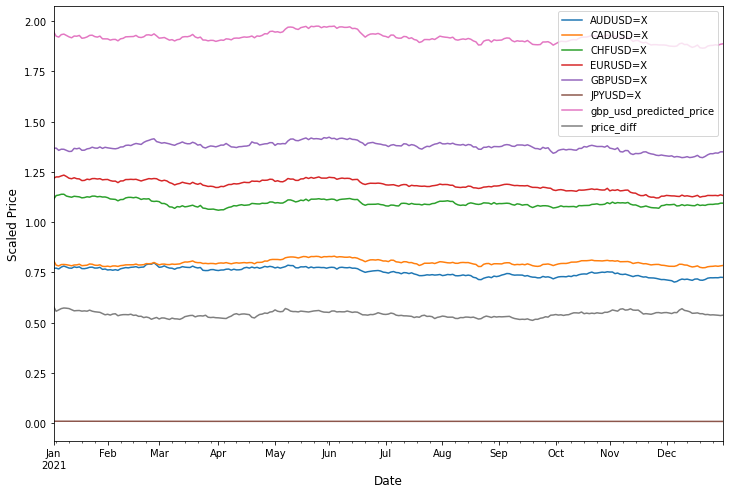

In [79]:
df_final.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Scaled Price', fontsize=12)
plt.legend(prop={'size': 10})
plt.show()

##Generate Trading Signals

In [96]:
# Constants that define strategy behavior/thresholds
StatArb_VALUE_FOR_BUY_ENTRY = 0.01  # StatArb trading signal value above which to enter buy-orders/long-position
StatArb_VALUE_FOR_SELL_ENTRY = -0.01  # StatArb trading signal value below which to enter sell-orders/short-position

In [97]:
#Take Diff of actual and predicted price
df_final['price_diff'] = df_final['gbp_usd_predicted_price']-df_final['GBPUSD=X']
df_final

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X,gbp_usd_predicted_price,price_diff
Date,,,,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,1.367301,0.009687,1.947346,0.580045
2021-01-04,0.771230,0.786034,1.132375,1.225070,1.368420,0.009686,1.925254,0.556834
2021-01-05,0.767100,0.782411,1.134765,1.225160,1.357160,0.009697,1.920614,0.563454
2021-01-06,0.776600,0.788973,1.138719,1.230027,1.362955,0.009739,1.933022,0.570067
2021-01-07,0.781700,0.789553,1.138861,1.234111,1.362528,0.009706,1.935531,0.573003
...,...,...,...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,1.340430,0.008746,1.879504,0.539073
2021-12-28,0.723700,0.782044,1.090322,1.133003,1.344267,0.008711,1.882475,0.538208
2021-12-29,0.723400,0.780457,1.090631,1.131478,1.343328,0.008713,1.880295,0.536967


In [98]:
#Generate Trading Signal for Trading Instrument
conditions = [
    (df_final['price_diff'] > StatArb_VALUE_FOR_BUY_ENTRY), 
    df_final['price_diff'] < StatArb_VALUE_FOR_SELL_ENTRY]
choices = ['Buy', 'Sell']
df_final['signal'] = np.select(conditions, choices, default=np.nan)

df_final

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X,gbp_usd_predicted_price,price_diff,signal
Date,,,,,,,,,
2021-01-01,0.770297,0.809723,1.113462,1.218027,1.367301,0.009687,1.947346,0.580045,Buy
2021-01-04,0.771230,0.786034,1.132375,1.225070,1.368420,0.009686,1.925254,0.556834,Buy
2021-01-05,0.767100,0.782411,1.134765,1.225160,1.357160,0.009697,1.920614,0.563454,Buy
2021-01-06,0.776600,0.788973,1.138719,1.230027,1.362955,0.009739,1.933022,0.570067,Buy
2021-01-07,0.781700,0.789553,1.138861,1.234111,1.362528,0.009706,1.935531,0.573003,Buy
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.723129,0.780396,1.088399,1.132426,1.340430,0.008746,1.879504,0.539073,Buy
2021-12-28,0.723700,0.782044,1.090322,1.133003,1.344267,0.008711,1.882475,0.538208,Buy
2021-12-29,0.723400,0.780457,1.090631,1.131478,1.343328,0.008713,1.880295,0.536967,Buy
